In [2]:
import pandas as pd
df=pd.read_excel("Ejemplo-k-medias.xlsx")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Edad                28 non-null     int64 
 1   Ingresos            28 non-null     int64 
 2   Educación Superior  28 non-null     object
 3   Estado Civil        28 non-null     object
 4   Estudio Postgrado   28 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Edad                28 non-null     int64 
 1   Ingresos            28 non-null     int64 
 2   Educación Superior  28 non-null     object
 3   Estado Civil        28 non-null     object
 4   Estudio Postgrado   28 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


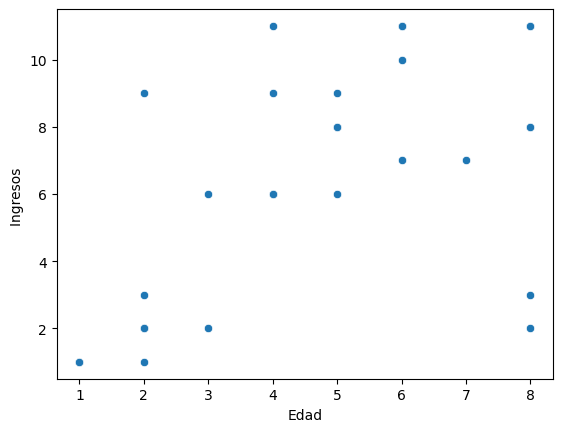

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df,x="Edad",y="Ingresos ")
plt.show()

In [5]:
#Librerías

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

In [6]:
#Modelo

k = 4

kmeans = KMeans(n_clusters=k, random_state=42)

grupo = kmeans.fit_predict(df[["Edad", "Ingresos "]])

df['Clasificacion']=grupo

In [7]:
#Varia desde -1 hasta 1

#mide que tan separados estan los grupos , el 1 es el mejor

print("Puntaje",silhouette_score(df[["Edad", "Ingresos "]], grupo))

Puntaje 0.40762364776995413


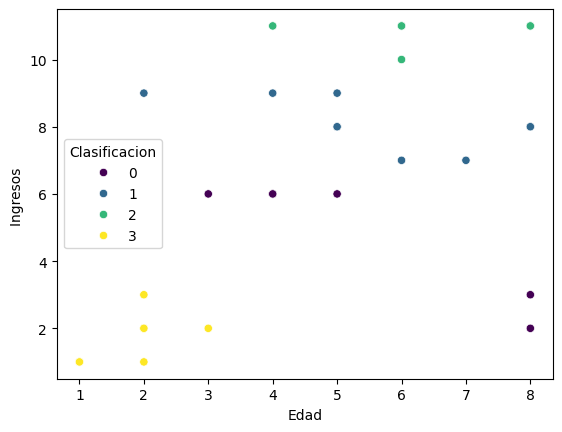

In [8]:
sns.scatterplot(data=df,x="Edad", y="Ingresos ",hue="Clasificacion",palette="viridis")

plt.show()

In [9]:
#Librerías

import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [10]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

X=mnist.data

y=mnist.target.astype(int)

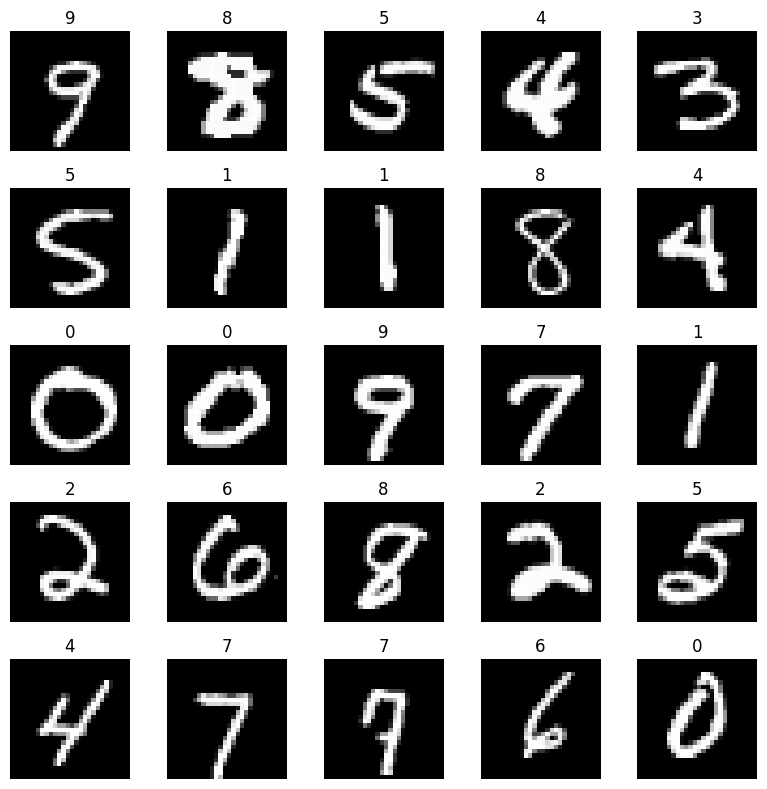

In [11]:
#graficos

N = 25

idx = np.random.choice(X.shape[0],N,replace=False)

X_sample = X[idx]

y_sample = y[idx]

fig,axes=plt.subplots(5,5,figsize=(8,8))

for i,ax in enumerate(axes.flat):

  ax.imshow(X_sample[i].reshape(28,28),cmap='gray')

  ax.set_title(y_sample[i])

  ax.axis('off')

plt.tight_layout()

plt.show()

In [12]:
#muestra de 2000 imagenes

idx = np.random.choice(X.shape[0],2000,replace=False)

X_sample = X[idx]

y_sample = y[idx]

from sklearn.manifold import TSNE

import umap

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

#Normalizar los datos

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_sample)

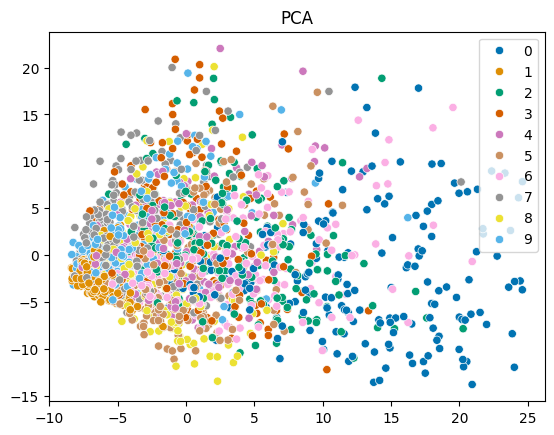

In [13]:
#PCA

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_scaled)

sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=y_sample,palette='colorblind')

plt.title("PCA")

plt.show()

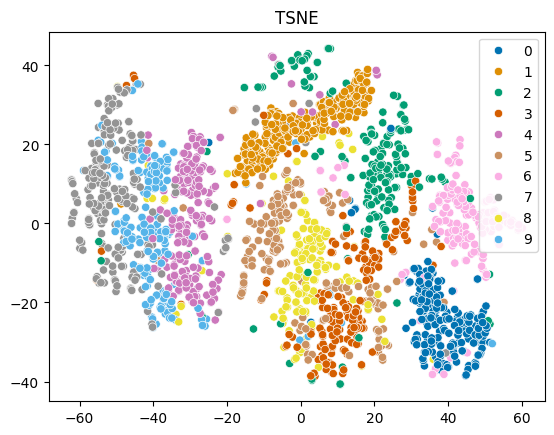

In [14]:
#Tsne

tsne = TSNE(n_components=2,perplexity=30,random_state=42)

X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(x=X_tsne[:,0],y=X_tsne[:,1],hue=y_sample,palette='colorblind')

plt.title("TSNE")

plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


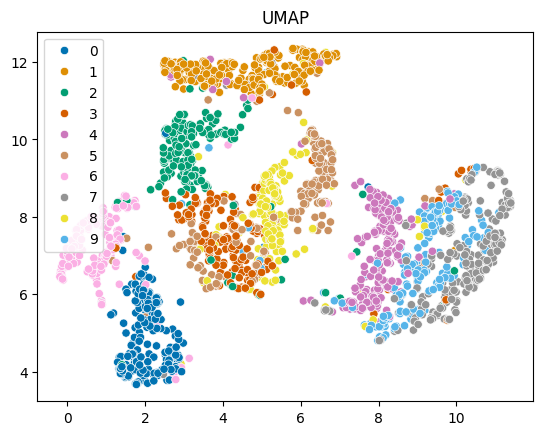

In [15]:
#Umap

umap_model = umap.UMAP(n_components=2,random_state=42)

X_umap = umap_model.fit_transform(X_scaled)

sns.scatterplot(x=X_umap[:,0],y=X_umap[:,1],hue=y_sample,palette='colorblind')

plt.title("UMAP")

plt.show()